### k-최근접 회귀

여름 농어 철로 농어 주문이 크게 늘어나자 한빛 마켓은 업계 최초로 농어를 무게 단위로 판매하려 한다. <br>
농어를 마리당 가격으로 판매했을 때 기대보다 볼품없는 농어를 받은 고객이 항의하는 일이 발생했기 때문이다. 

그런데 공급처에서 생선 무게를 잘못 측정해서 보냈다. 

무언가 고르는 문제가 아니고 무게를 예측해야 한다. <br>
이런 문제를 **회귀**라고 한다.

회귀는 정해진 클래스가 없고 임의의 수치를 출력한다.

### 데이터 준비 - 넘파이로 데이터 받기
<br> http://bit.ly/perch_data

In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
fish_data = [[l, w] for l, w in zip(perch_length, perch_weight)]

In [17]:
print(fish_data)
print(perch_length.shape)
print(perch_weight.shape)

[[8.4, 5.9], [13.7, 32.0], [15.0, 40.0], [16.2, 51.5], [17.4, 70.0], [18.0, 100.0], [18.7, 78.0], [19.0, 80.0], [19.6, 85.0], [20.0, 85.0], [21.0, 110.0], [21.0, 115.0], [21.0, 125.0], [21.3, 130.0], [22.0, 120.0], [22.0, 120.0], [22.0, 130.0], [22.0, 135.0], [22.0, 110.0], [22.5, 130.0], [22.5, 150.0], [22.7, 145.0], [23.0, 150.0], [23.5, 170.0], [24.0, 225.0], [24.0, 145.0], [24.6, 188.0], [25.0, 180.0], [25.6, 197.0], [26.5, 218.0], [27.3, 300.0], [27.5, 260.0], [27.5, 265.0], [27.5, 250.0], [28.0, 250.0], [28.7, 300.0], [30.0, 320.0], [32.8, 514.0], [34.5, 556.0], [35.0, 840.0], [36.5, 685.0], [36.0, 700.0], [37.0, 700.0], [37.0, 690.0], [39.0, 900.0], [39.0, 650.0], [39.0, 820.0], [40.0, 850.0], [40.0, 900.0], [40.0, 1015.0], [40.0, 820.0], [42.0, 1100.0], [43.0, 1000.0], [43.0, 1100.0], [43.5, 1000.0], [44.0, 1000.0]]
(56,)
(56,)


### matplotlib 사용하여 산점도를 그리자.

In [6]:
import matplotlib.pyplot as plt

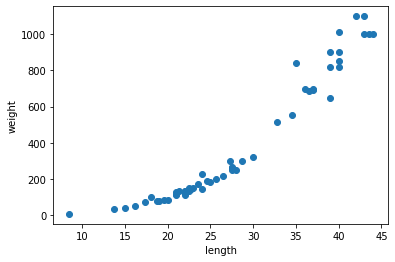

In [8]:
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 훈련 세트와 테스트 세트로 나누자.

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [10]:
print(train_input)
print(test_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [11]:
print(train_target)
print(test_target)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


### 2장에서는 2개의 특성을 사용했기 때문에 열이 2개인 2차원 배열을 사용하였다. <br>
### 이번에는 1개의 특성만을 사용하므로 수동적으로 2차원 배열을 만들어야 한다.

In [14]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [15]:
print(train_input.shape)
print(test_input.shape)

(1, 1)
(1, 1)


### 결정계수( 최근접 회귀 모델 불러오기)

결정계수 : 정확한 숫자를 맞춘다는 것은 거의 불가 <br>
각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한 다음에 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다.

### 타깃과 예측한 값 사이의 차이를 구해 보자.

### 과대적합과 과소적합